### Take four models of polynomials of degree (2, 3, 4, 5), and use the normal equation to optimize theta (with small lambda term, as shown in class). Split the weather data using (80:20) split, print train, and test loss for each model. Write which model you consider best based on train and test loss along with proper explanation.


normal equation = \[
(X^T X) \theta - (X^T y)
\]


In [1]:
import numpy as np
import xarray as xr
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.metrics import r2_score, mean_squared_error

In [2]:
polynomial=lambda x,n:x**n
models=[2,3,4,5]

In [3]:
#loading data
data=xr.open_dataset(r"C:\Users\vvagh\OneDrive - Indian Institute of Science Education and Research Bhopal\Documents\IISERB docs\workshoop assignments\PERCDR_0.25deg_2001_2010_precipitation_data.nc")
df=data.to_dataframe().reset_index()
df
#data

,datetime,lon,lat,crs,precip
0,2001-01-01,77.00,31.50,1,4.00
1,2001-01-01,77.00,31.25,1,5.91
2,2001-01-01,77.00,31.00,1,4.48
3,2001-01-01,77.00,30.75,1,4.40
4,2001-01-01,77.00,30.50,1,5.16
...,...,...,...,...,...
759611,2010-12-31,80.75,29.50,1,4.67
759612,2010-12-31,80.75,29.25,1,3.78
759613,2010-12-31,80.75,29.00,1,2.20
759614,2010-12-31,80.75,28.75,1,1.93


In [4]:
col=df.columns
col
y=df[['precip']].values
y
scale=StandardScaler()

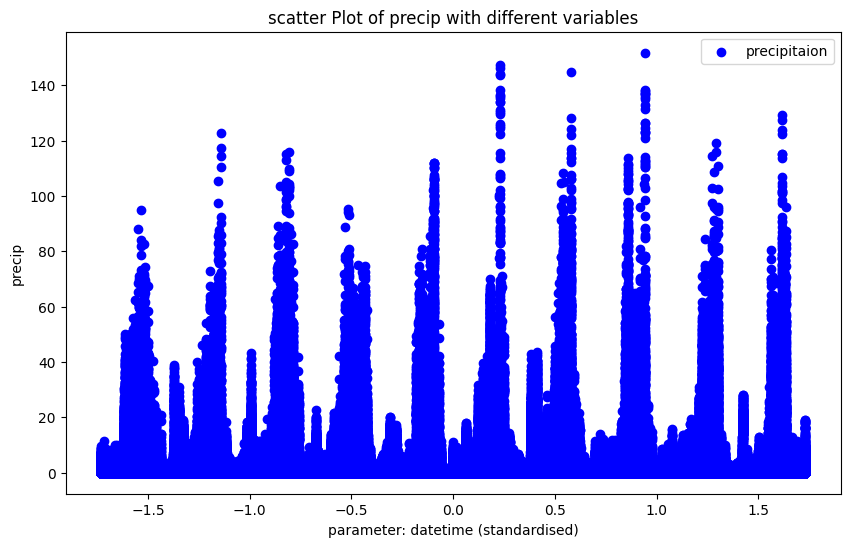

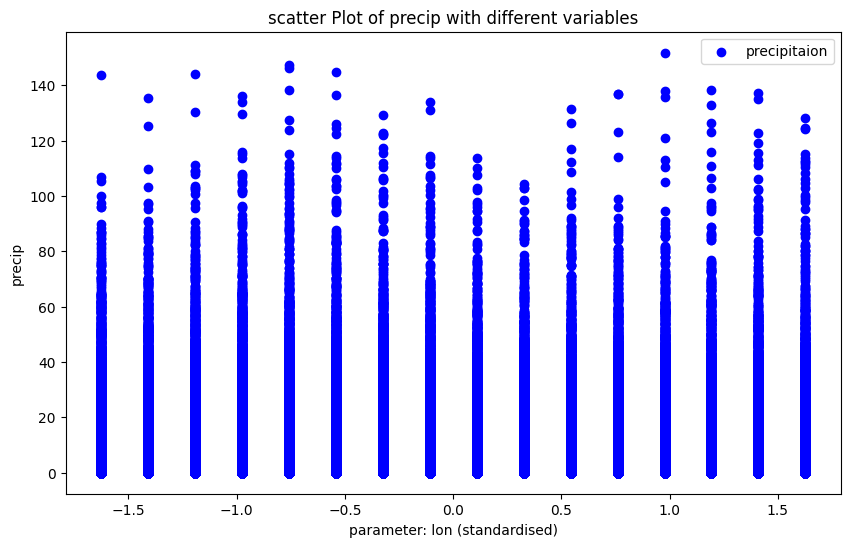

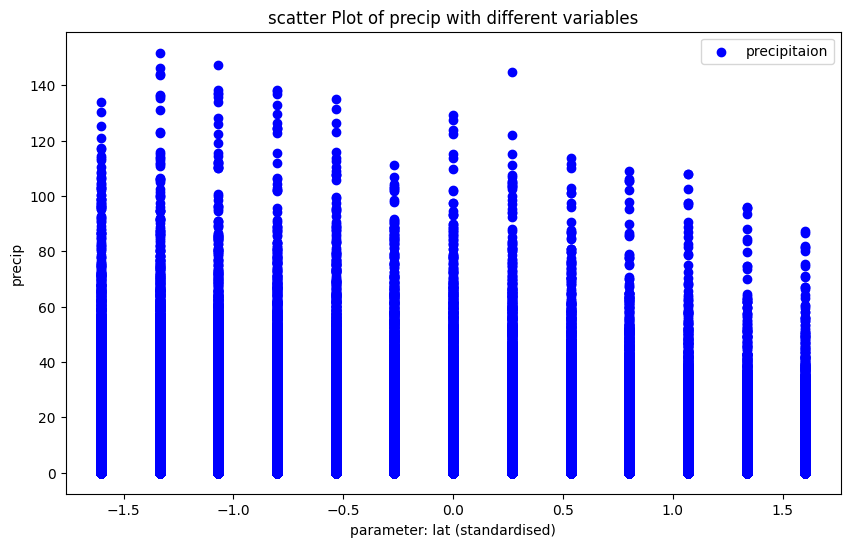

In [5]:
for x in col[:len(col)-2]:
    X_reshaped = df[x].values.reshape(-1, 1)
    X_scaled = scale.fit_transform(X_reshaped)
    plt.figure(figsize=(10, 6))
    plt.scatter(X_scaled, y, color='blue', label='precipitaion')
    plt.xlabel(f'parameter: {x} (standardised)')
    plt.ylabel('precip')
    plt.title('scatter Plot of precip with different variables')
    plt.legend()
    plt.show()


In [6]:
# there might be problems as all the 3 of them are highly corelated.
df['day']=df['datetime'].dt.day
df['month']=df['datetime'].dt.month
df['year']=df['datetime'].dt.year

In [7]:
df

,datetime,lon,lat,crs,precip,day,month,year
0,2001-01-01,77.00,31.50,1,4.00,1,1,2001
1,2001-01-01,77.00,31.25,1,5.91,1,1,2001
2,2001-01-01,77.00,31.00,1,4.48,1,1,2001
3,2001-01-01,77.00,30.75,1,4.40,1,1,2001
4,2001-01-01,77.00,30.50,1,5.16,1,1,2001
...,...,...,...,...,...,...,...,...
759611,2010-12-31,80.75,29.50,1,4.67,31,12,2010
759612,2010-12-31,80.75,29.25,1,3.78,31,12,2010
759613,2010-12-31,80.75,29.00,1,2.20,31,12,2010
759614,2010-12-31,80.75,28.75,1,1.93,31,12,2010


In [8]:
#rearranging and deleting the columns.
order=['year','month','day','lon','lat','crs','precip']
df=df[order]
df

,year,month,day,lon,lat,crs,precip
0,2001,1,1,77.00,31.50,1,4.00
1,2001,1,1,77.00,31.25,1,5.91
2,2001,1,1,77.00,31.00,1,4.48
3,2001,1,1,77.00,30.75,1,4.40
4,2001,1,1,77.00,30.50,1,5.16
...,...,...,...,...,...,...,...
759611,2010,12,31,80.75,29.50,1,4.67
759612,2010,12,31,80.75,29.25,1,3.78
759613,2010,12,31,80.75,29.00,1,2.20
759614,2010,12,31,80.75,28.75,1,1.93
